In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# K means Clustering
X,y_true=make_blobs(n_samples=500,centers=3,cluster_std=0.60,random_state=42)

In [3]:
df=pd.DataFrame(X,columns=['Feature_1','Feature_2'])
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [4]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)

In [5]:
inertia=[]      # inertia is WCSS
k_range=range(1,11)

In [6]:
for k in k_range:
    Kmeans=KMeans(n_clusters=k,random_state=42)
    Kmeans.fit(X_scaled)
    inertia.append(Kmeans.inertia_)

In [7]:
inertia

[1000.0000000000002,
 297.89541410517234,
 11.575484723104983,
 9.752067977356848,
 8.257175272446283,
 6.917577320416797,
 6.334755391595287,
 5.704177177901432,
 5.060234133532079,
 4.7623618981304]

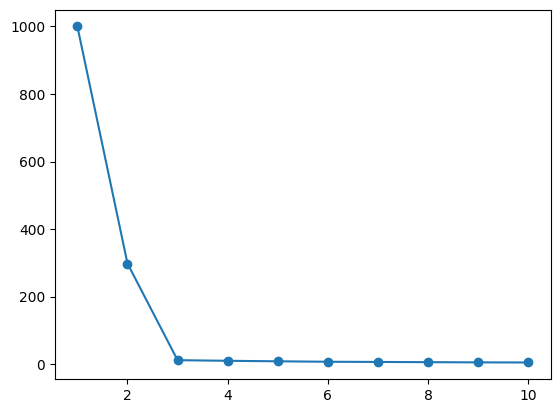

In [8]:
plt.plot(k_range,inertia,marker='o')

In [9]:
Kmeans_final=KMeans(n_clusters=3,random_state=42)
cluster_labels=Kmeans_final.fit_predict(X_scaled)

In [10]:
df['cluster']=cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

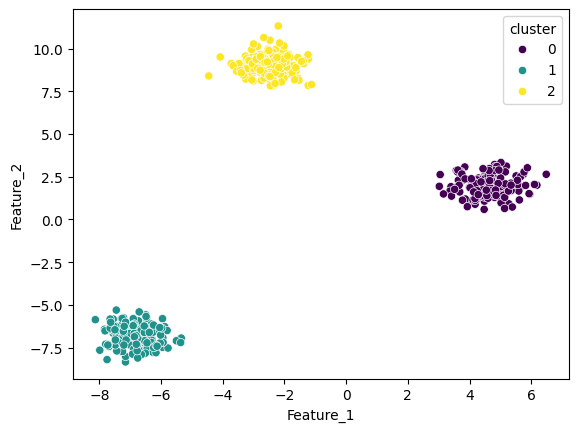

In [11]:
sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')

In [12]:
# DBSCAN
from sklearn.datasets import make_moons


In [13]:
X,y_true=make_moons(n_samples=500,noise=0.05,random_state=42)

In [14]:
from sklearn.cluster import KMeans,DBSCAN

In [15]:
df=pd.DataFrame(X,columns=['Feature_1','Feature_2'])

In [16]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)

In [17]:
dbscan=DBSCAN(eps=0.3,min_samples=5)
dbscan_labels=dbscan.fit_predict(X_scaled)

In [18]:
df['dbscan_cluster']=dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

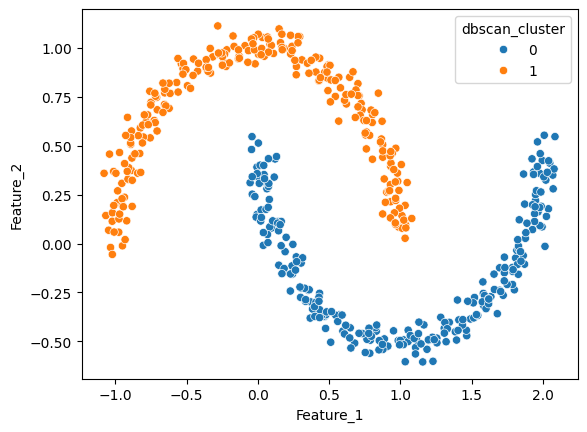

In [19]:
sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['dbscan_cluster'],
                palette='tab10')

In [20]:
# PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
X,y=make_blobs(n_samples=500,n_features=5,centers=3,cluster_std=1.5,random_state=42)

In [22]:
scale=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [23]:
X_scaled

array([[-1.07039133,  0.74546814,  0.0859273 , -1.58466105, -0.90798501],
       [-0.52251206,  0.61451192,  0.08731966, -0.95761934, -0.68801347],
       [ 0.78222538,  0.4223533 , -1.04593191,  0.20984645, -0.76407462],
       ...,
       [ 0.14922774, -1.22161917,  0.65212732,  0.82409945,  1.98001159],
       [ 1.16073493,  0.7636525 , -0.01629411,  0.39814317, -0.84828797],
       [-0.70166364, -1.61902103,  1.11350971,  1.38647649,  1.30212699]],
      shape=(500, 5))

In [24]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
X_pca

array([[ 1.40522818e+00, -1.73079914e+00],
       [ 1.03463536e+00, -9.82792414e-01],
       [ 1.10182830e+00,  1.09084050e+00],
       [-1.76465839e+00,  1.09970698e-01],
       [ 8.59673831e-01, -1.63970361e+00],
       [ 1.09738958e+00,  1.11937509e+00],
       [ 1.04453451e+00,  1.88953610e+00],
       [-3.14810185e+00, -1.06909853e-01],
       [-1.34287183e+00,  7.48033000e-01],
       [ 4.59419122e-01,  9.66806100e-01],
       [ 1.64897776e+00,  1.95384681e+00],
       [ 7.73369393e-01,  2.09584610e+00],
       [-1.92869648e+00,  9.48608771e-02],
       [ 1.15480661e+00, -1.42564791e+00],
       [ 7.07330515e-01, -1.01056640e+00],
       [ 1.59661674e+00, -1.64931961e+00],
       [-2.40550592e+00, -7.53357753e-01],
       [-1.97627695e+00, -3.59747020e-02],
       [ 1.26193015e+00,  2.72813008e+00],
       [ 1.58339885e+00, -1.46125327e+00],
       [ 1.61435981e+00,  1.29812279e+00],
       [-1.74438705e+00,  1.58820049e-01],
       [-1.88938008e+00,  3.66662930e-01],
       [ 6.

In [25]:
df_pca=pd.DataFrame(X_pca,columns=['PC1','PC2'])
df_pca['label']=y

<Axes: xlabel='PC1', ylabel='PC2'>

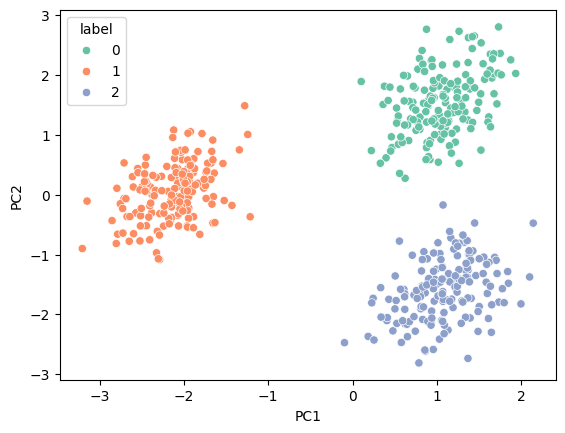

In [26]:
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='label',palette='Set2')